In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/btcusdt.csv")
df

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore
0,2022-07-14 14:42:00,19970.23,19976.38,19961.92,19969.78,54.23882,1657780979999,1.083113e+06,2086,25.42902,5.078110e+05,0
1,2022-07-14 14:43:00,19969.78,19988.07,19966.83,19981.67,76.44766,1657781039999,1.527254e+06,2569,42.97334,8.585345e+05,0
2,2022-07-14 14:44:00,19979.52,20001.43,19977.89,20000.75,76.81600,1657781099999,1.535827e+06,2402,41.71792,8.341394e+05,0
3,2022-07-14 14:45:00,19998.08,20054.66,19998.07,20041.96,231.96826,1657781159999,4.646698e+06,5870,142.64732,2.857418e+06,0
4,2022-07-14 14:46:00,20041.96,20064.88,20033.21,20036.43,138.45879,1657781219999,2.775858e+06,3948,73.39213,1.471429e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-07-15 23:56:00,20851.75,20854.06,20830.30,20839.44,59.04577,1657900619999,1.230599e+06,2489,30.08875,6.271038e+05,0
1996,2022-07-15 23:57:00,20841.31,20842.00,20812.00,20814.05,56.00447,1657900679999,1.166369e+06,2358,24.57709,5.118785e+05,0
1997,2022-07-15 23:58:00,20814.05,20817.98,20783.89,20788.67,246.16047,1657900739999,5.119846e+06,4757,99.75851,2.074993e+06,0
1998,2022-07-15 23:59:00,20785.52,20803.22,20777.00,20792.19,110.59637,1657900799999,2.299633e+06,3442,59.21621,1.231400e+06,0


In [3]:
df['returns'] = df['Close'] - df['Close'].shift(-1)
df.dropna(inplace=True)

In [13]:
df.head()

,Opentime,Open,High,Low,Close,Volume,Closetime,Quote asset volume,Number of trades,Taker by base,Taker buy quote,Ignore,returns
0,2022-07-14 14:42:00,19970.23,19976.38,19961.92,19969.78,54.23882,1657780979999,1.083113e+06,2086,25.42902,5.078110e+05,0,-11.89
1,2022-07-14 14:43:00,19969.78,19988.07,19966.83,19981.67,76.44766,1657781039999,1.527254e+06,2569,42.97334,8.585345e+05,0,-19.08
2,2022-07-14 14:44:00,19979.52,20001.43,19977.89,20000.75,76.81600,1657781099999,1.535827e+06,2402,41.71792,8.341394e+05,0,-41.21
3,2022-07-14 14:45:00,19998.08,20054.66,19998.07,20041.96,231.96826,1657781159999,4.646698e+06,5870,142.64732,2.857418e+06,0,5.53
4,2022-07-14 14:46:00,20041.96,20064.88,20033.21,20036.43,138.45879,1657781219999,2.775858e+06,3948,73.39213,1.471429e+06,0,-0.27


In [5]:
import sys
sys.path.append('../')
from libbot import *

In [6]:
rsi_windows = run_blocks(df['returns'], 14, compute_rsi)

## Result

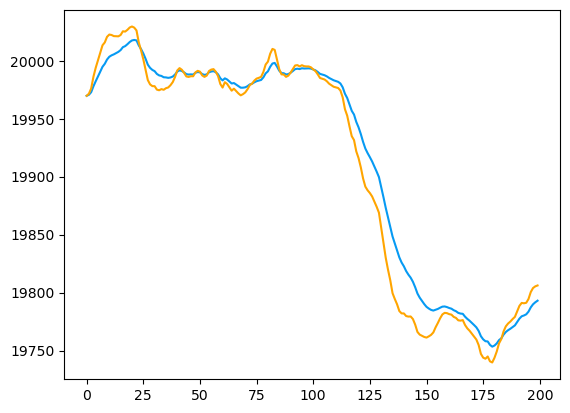

In [7]:
ewma_long = df['Close'].iloc[0:200].ewm(span=INIT_LONG_EMA, adjust=False).mean()
ewma_short = df['Close'].iloc[0:200].ewm(span=INIT_SHORT_EMA, adjust=False).mean()

plt.plot(ewma_long, '-', color='#069AF3')
plt.plot(ewma_short, '-', color='#FFA500')
plt.show()

In [8]:
macd_tb = compute_macd(df['Close'].iloc[0:200], 26, 12, 9)
macd_tb

,macd,signal,hist
0,0.000000,0.000000,0.000000
1,-0.948490,-0.189698,-0.758792
2,-3.202851,-0.792329,-2.410523
3,-8.219996,-2.277862,-5.942134
4,-11.615993,-4.145488,-7.470505
...,...,...,...
195,-10.917432,-8.466076,-2.451356
196,-13.202276,-9.413316,-3.788960
197,-14.034649,-10.337582,-3.697067
198,-13.753065,-11.020679,-2.732386


In [12]:
close_prices = df['Close'].iloc[0:200]
buy_price, sell_price, macd_signal = macd_strategy(df['Close'].iloc[0:200], macd_tb)